# Decision Tree
- Dataset reference: https://archive.ics.uci.edu/ml/datasets/Ionosphere

# What is Decision Tree
- Decision Trees are a type of `Supervised Machine Learning` (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.
- There are many algorithms there to build a decision tree. They are

    - CART (Classification and Regression Trees) — This makes use of `Gini impurity` as the metric.
    - ID3 (Iterative Dichotomiser 3) — This uses `entropy` and `information gain` as metric.

# Where to use Decision Tree
- For classification or Regression problem
- Also known as `CART(Classification & Regression Tree) model`

# Some Vocabulury

## Entropy
- Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations. It determines how a decision tree chooses to split data
- This also tells randomness in data

## Information Gain
- The information gained in the decision tree can be defined as the amount of information improved in the nodes before splitting them for making further decisions.
- Information gain helps to determine the order of attributes in the nodes of a decision tree. The main node is referred to as the parent node, whereas sub-nodes are known as child nodes. We can use information gain to determine how good the splitting of nodes in a decision tree.

## Gini impurity
- Gini Impurity is a measurement used to build Decision Trees to determine how the features of a dataset should split nodes to form the tree.
$$1-\sum_{i=0}^{k}{P(k)^2}$$
- Where k is classes

## Pure and Impure node
- The decision to split at each node is made according to the metric called purity . A node is 100% impure when a node is split evenly 50/50 and 100% pure when all of its data belongs to a single class. In order to optimize our model we need to reach maximum purity and avoid impurity.


## Pruning
- Pruning reduces the size of decision trees by removing parts of the tree that do not provide power to classify instances.

# Mathematical Intution behind `Decision Tree`

$$Entropy = H(S)= -\sum_{i=0}^{k}P(x_i)log_2{P(x_i)}$$
$$Information Gain(IG) = H(S)-\sum_{i=0}^{k}P(x_i)*H(x)$$
- Where k is classes

# Gini Vs Entropy
- Gini is more efficient computationally and faster than Entropy because there is no log in it
- Due to this Gini is default parameter set in scikit learn for Decision tree model

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,export_graphviz,export_text,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [80]:
df = sns.load_dataset("iris")

In [106]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [81]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

In [84]:
dt = DecisionTreeClassifier()

In [85]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

## Accuracy Score

In [86]:
accuracy_score(y_test,y_pred)

0.9333333333333333

## Confusion Matrix

In [89]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  7]])

<AxesSubplot:>

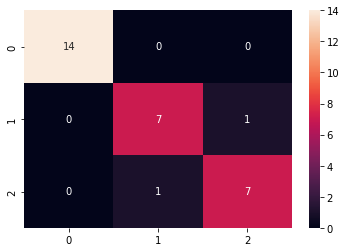

In [90]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

## Noumber of classes

In [91]:
dt.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Get text based Decision tree details

In [93]:
print(export_text(dt))

|--- feature_3 <= 0.80
|   |--- class: setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: versicolor
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



# Get picture based Decision tree details
- if plotting is not working then install following libraries
- Install graphviz executable https://graphviz.org/download/
- PyDotPlus is an improved version of the old pydot project that provides a Python Interface to Graphviz's Dot language.


In [94]:
import pydotplus #PyDotPlus is an improved version of the old pydot project that provides a Python Interface to Graphviz's Dot language.
import graphviz as graph
from IPython.display import Image, display

In [97]:
img = export_graphviz(dt,filled = True,rounded=True,feature_names=df.keys()[:-1],class_names=dt.classes_)

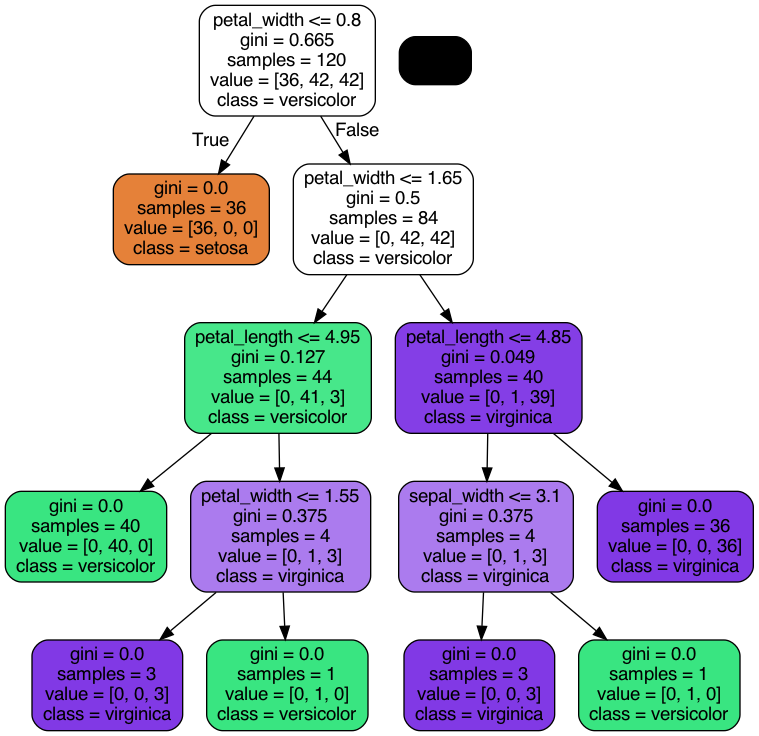

In [98]:
graph = pydotplus.graph_from_dot_data(img)
display(Image(data=graph.create_png()))

# Plot Decision tree

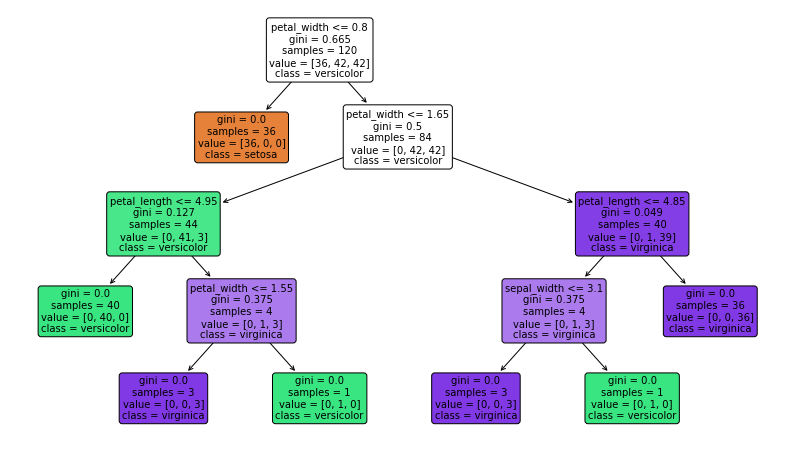

In [108]:
plt.figure(figsize=(14,8))
_ = plot_tree(dt,rounded=True,filled=True,feature_names=df.keys()[:-1],class_names=dt.classes_,fontsize=10)
plt.show()

# Advantages and disadvantages of decision trees

- `Advantages`:

    - Decision trees are super interpretable
    - Require little data preprocessing
    - Suitable for low latency applications

- `Disadvantages`:
    - More likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper. A solution for it is `pruning`. 
    - Another way to avoid overfitting is to use `bagging techniques like Random Forest`.